In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<AxesSubplot:>

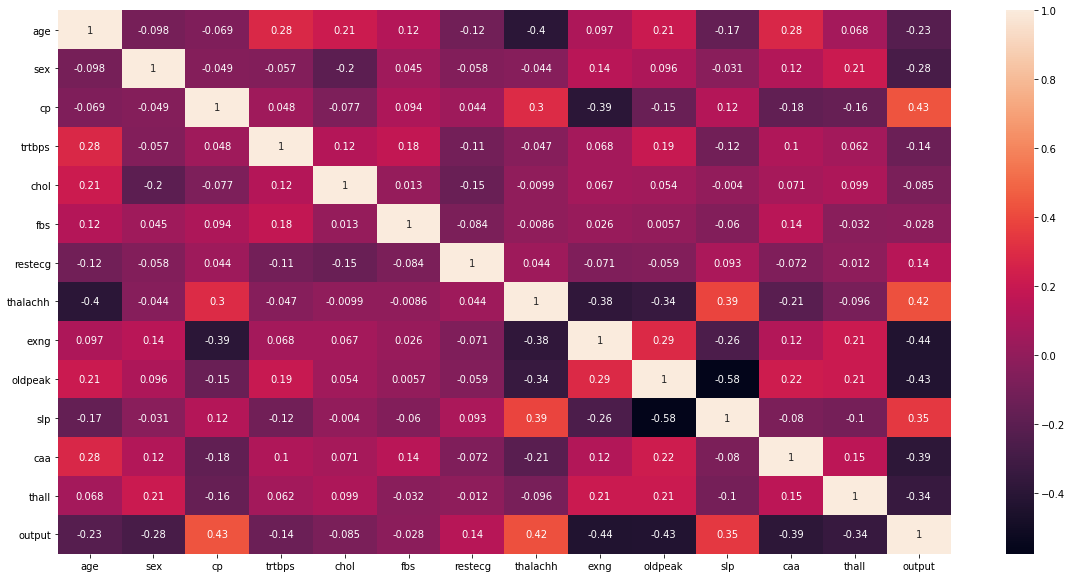

In [5]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),
           annot=True)

<AxesSubplot:xlabel='sex', ylabel='age'>

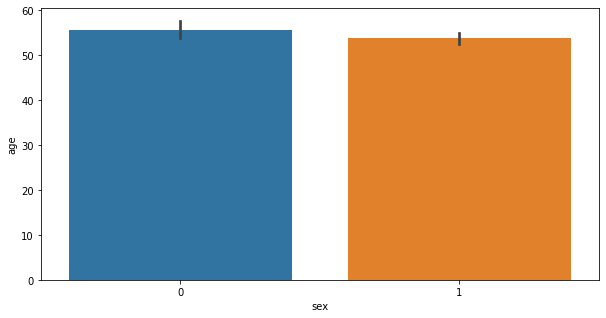

In [6]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='sex', y='age')

<Figure size 720x720 with 0 Axes>

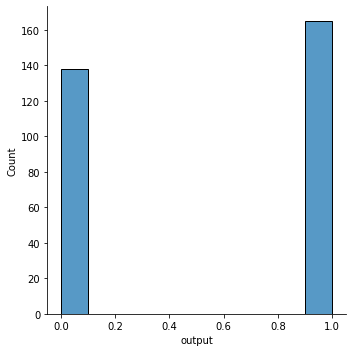

In [7]:
plt.figure(figsize=(10,10))
sns.displot(df['output'])

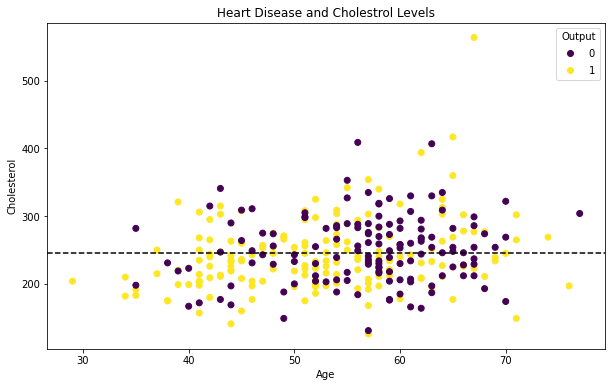

In [8]:

## OO method from scratch
fig, ax = plt.subplots(figsize=(10,6))
## plot the data
scatter = ax.scatter(x= df["age"],
                    y=df["chol"],
                    c=df["output"]);
# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
      xlabel = "Age",
     ylabel ="Cholesterol");
# Addd a legend
ax.legend(*scatter.legend_elements(),title="Output");

# Add a horizontal line
ax.axhline(df["chol"].mean(),linestyle='--', color='black')
plt.style.use('ggplot')

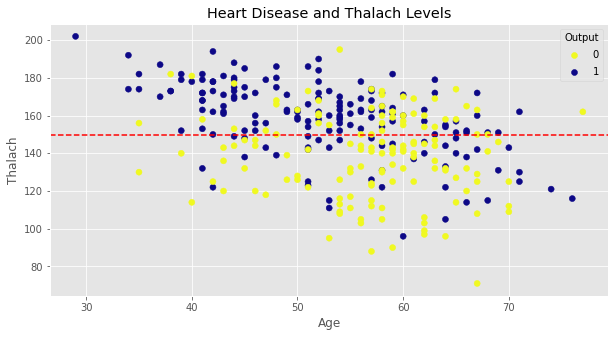

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
# plot the data
scatter = ax.scatter(x=df['age'],
                    y=df['thalachh'],
                    c=df['output'],
                    cmap='plasma_r')
#customize the plot
ax.set(title='Heart Disease and Thalach Levels',
      xlabel='Age',
      ylabel='Thalach')

# Add a legend
ax.legend(*scatter.legend_elements(), title='Output')

# mean
ax.axhline(df['thalachh'].mean(), linestyle='--', color='red')
plt.style.use('ggplot')


In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


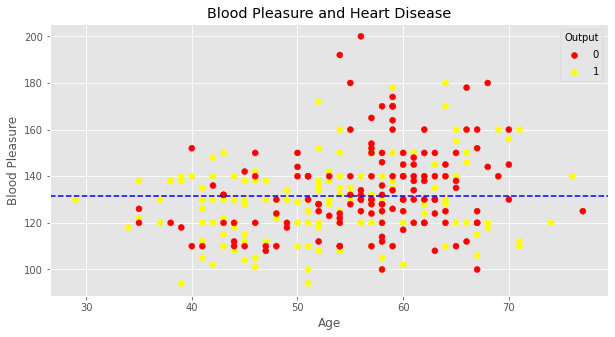

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
# plot the data
scatter = plt.scatter(x=df['age'],
                     y=df['trtbps'],
                     c=df['output'],
                     cmap='autumn')
# Customize the plot
ax.set(title='Blood Pleasure and Heart Disease',
    xlabel='Age',
      ylabel='Blood Pleasure'
      )

# legend
ax.legend(*scatter.legend_elements(), title='Output')
ax.axhline(df['trtbps'].mean(), linestyle='--', color='blue')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

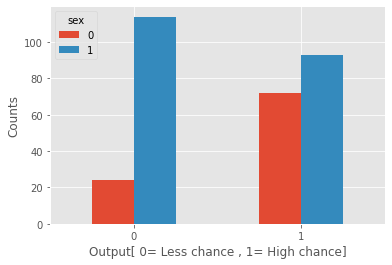

In [12]:
pd.crosstab(df['output'], df['sex']).plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Output[ 0= Less chance , 1= High chance]' )
plt.xticks(rotation=0)

In [13]:
# Split the dataset
X = df.drop('output', axis=1)
y = df['output']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(242, 61, 242, 61)

In [14]:
# Modelling
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

print(f"Score : {rfc.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(rfc, X, y, cv=5))}")

Score : 0.8032786885245902
Cross_val_score : 0.8381967213114756


In [15]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

print(f"Score : {gbc.score(X_test, y_test)}")
print(f"Cross_val_score: {np.mean(cross_val_score(gbc, X, y, cv=5))}")

Score : 0.8524590163934426
Cross_val_score: 0.811639344262295


In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=42)
lrc.fit(X_train, y_train)
print(f"Score : {lrc.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(lrc, X, y, cv=5))}")

Score : 0.8688524590163934
Cross_val_score : 0.8216393442622951


In [18]:
# LinearSVC
from sklearn.svm import LinearSVC
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

print(f"Score : {svc.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(svc, X, y, cv=5))}")

Score : 0.5081967213114754
Cross_val_score : 0.6472677595628415


In [19]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(42)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print(f"Score : {knn.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(knn, X, y, cv=5))}")


Score : 0.7213114754098361
Cross_val_score : 0.643879781420765


In [20]:
# XGBoost

from xgboost import XGBClassifier
np.random.seed(42)
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

print(f"Score : {xgb.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(xgb, X, y, cv=5))}")

[11:33:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score : 0.7868852459016393
[11:33:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:33:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd

In [21]:
# lightbgm
from lightgbm import LGBMClassifier
np.random.seed(42)
lgb = LGBMClassifier()
lgb.fit(X_train, y_train)

print(f"Score : {lgb.score(X_test, y_test)}")
print(f"Cross_val_score : {np.mean(cross_val_score(lgb, X, y, cv=5))}")

Score : 0.8524590163934426
Cross_val_score : 0.8083606557377049


In [22]:
# Catboost
from catboost import CatBoostClassifier
np.random.seed(42)
cat = CatBoostClassifier()
cat.fit(X_train, y_train)

print(f"Score : {cat.score(X_test, y_test)}")

Learning rate set to 0.005621
0:	learn: 0.6884236	total: 51.1ms	remaining: 51s
1:	learn: 0.6840519	total: 52.2ms	remaining: 26s
2:	learn: 0.6803068	total: 53.2ms	remaining: 17.7s
3:	learn: 0.6759580	total: 54.1ms	remaining: 13.5s
4:	learn: 0.6724276	total: 54.7ms	remaining: 10.9s
5:	learn: 0.6680362	total: 55.4ms	remaining: 9.18s
6:	learn: 0.6643339	total: 56ms	remaining: 7.95s
7:	learn: 0.6603290	total: 56.7ms	remaining: 7.03s
8:	learn: 0.6563192	total: 57.4ms	remaining: 6.32s
9:	learn: 0.6519382	total: 58ms	remaining: 5.74s
10:	learn: 0.6477529	total: 58.6ms	remaining: 5.27s
11:	learn: 0.6445704	total: 60ms	remaining: 4.94s
12:	learn: 0.6409836	total: 61.4ms	remaining: 4.66s
13:	learn: 0.6369743	total: 62.8ms	remaining: 4.42s
14:	learn: 0.6334143	total: 64.2ms	remaining: 4.21s
15:	learn: 0.6295821	total: 65.5ms	remaining: 4.03s
16:	learn: 0.6259989	total: 66.8ms	remaining: 3.86s
17:	learn: 0.6227786	total: 68ms	remaining: 3.71s
18:	learn: 0.6198121	total: 69.3ms	remaining: 3.58s
19:	

In [23]:
# Hyperparamete tuning
from sklearn.model_selection import GridSearchCV
cbc = CatBoostClassifier()

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)
gscv.fit(X_train, y_train)

Learning rate set to 0.042157
0:	learn: 0.6820146	total: 280us	remaining: 27.8ms
1:	learn: 0.6714015	total: 839us	remaining: 41.2ms
2:	learn: 0.6606493	total: 1.27ms	remaining: 41.2ms
3:	learn: 0.6517742	total: 1.67ms	remaining: 40.1ms
4:	learn: 0.6423429	total: 2.04ms	remaining: 38.9ms
5:	learn: 0.6344779	total: 2.4ms	remaining: 37.6ms
6:	learn: 0.6274962	total: 2.77ms	remaining: 36.9ms
7:	learn: 0.6191482	total: 3.21ms	remaining: 36.9ms
8:	learn: 0.6101483	total: 3.46ms	remaining: 35ms
9:	learn: 0.5999888	total: 3.83ms	remaining: 34.5ms
10:	learn: 0.5903974	total: 4.16ms	remaining: 33.7ms
11:	learn: 0.5849492	total: 4.51ms	remaining: 33.1ms
12:	learn: 0.5773590	total: 4.84ms	remaining: 32.4ms
13:	learn: 0.5711232	total: 5.22ms	remaining: 32.1ms
14:	learn: 0.5645408	total: 5.56ms	remaining: 31.5ms
15:	learn: 0.5600787	total: 5.92ms	remaining: 31.1ms
16:	learn: 0.5543334	total: 6.29ms	remaining: 30.7ms
17:	learn: 0.5500178	total: 6.68ms	remaining: 30.4ms
18:	learn: 0.5443484	total: 7.0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd4543e87d0>,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [24]:
gscv.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [25]:
model = CatBoostClassifier(max_depth=3,
                          n_estimators=100)
np.random.seed(42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
y_preds



Learning rate set to 0.046433
0:	learn: 0.6780837	total: 293us	remaining: 29ms
1:	learn: 0.6649647	total: 703us	remaining: 34.5ms
2:	learn: 0.6525124	total: 1.15ms	remaining: 37.1ms
3:	learn: 0.6415467	total: 1.47ms	remaining: 35.3ms
4:	learn: 0.6301849	total: 1.75ms	remaining: 33.4ms
5:	learn: 0.6207479	total: 2.04ms	remaining: 31.9ms
6:	learn: 0.6148100	total: 2.33ms	remaining: 30.9ms
7:	learn: 0.6038651	total: 2.61ms	remaining: 30ms
8:	learn: 0.5937824	total: 2.92ms	remaining: 29.5ms
9:	learn: 0.5860942	total: 3.27ms	remaining: 29.4ms
10:	learn: 0.5789802	total: 3.61ms	remaining: 29.2ms
11:	learn: 0.5726889	total: 3.95ms	remaining: 28.9ms
12:	learn: 0.5641841	total: 4.29ms	remaining: 28.7ms
13:	learn: 0.5574970	total: 4.84ms	remaining: 29.8ms
14:	learn: 0.5504428	total: 5.19ms	remaining: 29.4ms
15:	learn: 0.5457110	total: 5.51ms	remaining: 29ms
16:	learn: 0.5412096	total: 5.84ms	remaining: 28.5ms
17:	learn: 0.5370474	total: 6.24ms	remaining: 28.4ms
18:	learn: 0.5291685	total: 6.58ms

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

Text(0.5, 1.0, 'Confusion Matrix')

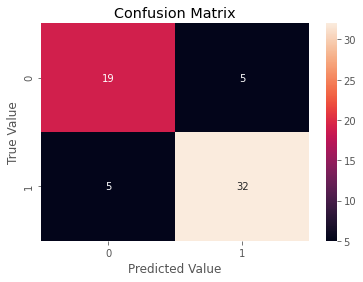

In [26]:
# Evaluation metrics
from sklearn.metrics import confusion_matrix
conn = confusion_matrix(y_test, y_preds)

sns.heatmap(conn,
            annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

In [27]:
from sklearn.metrics  import accuracy_score , precision_score, recall_score, f1_score

print(f"Accuracy : {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision : {precision_score(y_test, y_preds)}")
print(f"Recall : {recall_score(y_test, y_preds)}")
print(f"F1 : {f1_score(y_test, y_preds)}")

Accuracy : 83.61%
Precision : 0.8648648648648649
Recall : 0.8648648648648649
F1 : 0.8648648648648649


In [28]:
from sklearn.metrics import classification_report
classification_report(y_test, y_preds)

'              precision    recall  f1-score   support\n\n           0       0.79      0.79      0.79        24\n           1       0.86      0.86      0.86        37\n\n    accuracy                           0.84        61\n   macro avg       0.83      0.83      0.83        61\nweighted avg       0.84      0.84      0.84        61\n'